### Ejercicio 2. Visualización de datos en pandas

En este trabajo vamos a realizar una exploración visual de los datos contenidos en el archivo titanic.csv. Para ello, leemos este archivo en un DataFrame y a partir de él creamos las siguientes gráficas. Para cada una de ellas, cada alumno debe mostrarla como crea que se visualice mejor y ajustar todos los parámetros que sean oportunos hasta que quede a su gusto. (Yo muestro un ejemplo)

Nuestro DataFrame tiene 12 columnas. Para cada uno de los pasajeros, se guarda la siguiente información:
* PassengerId: identificador del pasajero
* Suvived: 0 si no sobrevivió; 1 si sí lo hizo
* Pclass: 1, 2 o 3: clase en la que viajaba (1 – Primera clase; 2 – Segunda clase; 3 – Tercera clase)
* Name: Nombre del pasajero
* Sex: male o female: sexo del pasajero
* Age: edad
* SibSp: número de hermanos y cónyuges que viajaban en el barco
* Parch: número de padres e hijos que viajaban en el barco
* Ticket: número de ticket
* Fare: precio del pasaje
* Cabin: cabina en la que viajaba
* Embarked: C, Q o S: puerto en el que embarcaron (C – Cherbourg; Q – Queenstown; S – Southampton)

#### Apartado 1
Visualizamos en una gráfica de barras el número de supervivientes frente al número de no supervivientes.
<img src="ejemplo1.png" style="width:300px">

<IPython.core.display.Javascript object>


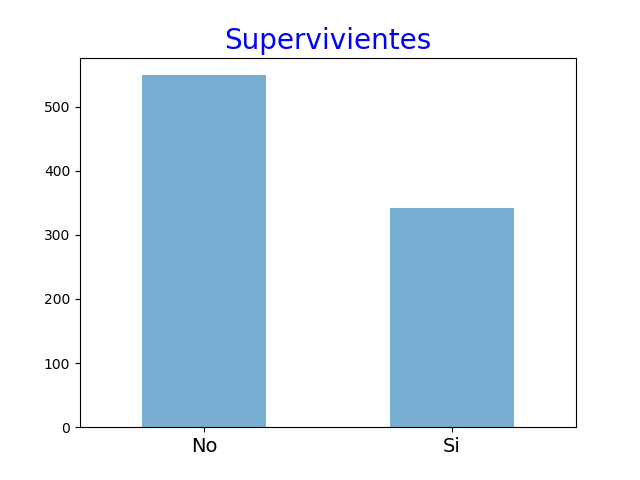

Text(0.5, 1.0, 'Supervivientes')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

datos=pd.read_csv("titanic.csv")

figura=datos.Survived.value_counts().plot(kind='bar',rot=0,alpha=0.6)
figura.set_xticklabels(['No','Si'],fontsize=14)
figura.set_title('Supervivientes',fontsize=20,color='b')

#### Apartado 2
Mediante un gráfico de cajas, vamos a mostrar las edades de los pasajeros, separando los datos de los hombres de los datos de las mujeres.
<img src="ejemplo2.png" style="width:300px">

<IPython.core.display.Javascript object>


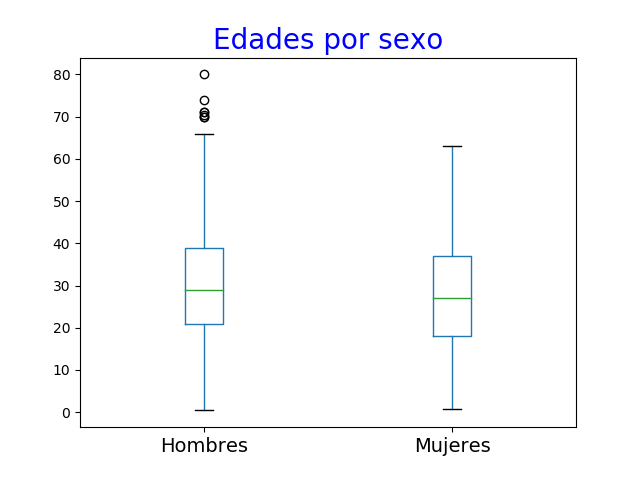

[Text(0,0,u'Hombres'), Text(0,0,u'Mujeres')]

In [2]:
hombres=datos[datos.Sex=='male'].Age
hombres=hombres.dropna()
hombres.index=np.arange(1,454)
mujeres=datos[datos.Sex=='female'].Age
mujeres=mujeres.dropna()
mujeres.index=np.arange(1,262)
edades=pd.concat([hombres, mujeres], axis=1)
edades.columns=['Hombres','Mujeres']
figura=edades.plot(kind='box')
figura.set_title('Edades por sexo',fontsize=20,color='blue')
figura.set_xticklabels(['Hombres','Mujeres'],fontsize=14)

#### Apartado 3
Queremos saber si la tasa de supervivencia dependió de la edad de los viajeros. Además, si este hecho fue diferente para hombres y mujeres. Para ello, mostramos en un gráfico las edades de los supervivientes así como las de los no supervivientes, separando esta información en dos subgráficos: uno para hombres y otro para mujeres.
<img src="ejemplo3.png" style="width:300px">

<IPython.core.display.Javascript object>


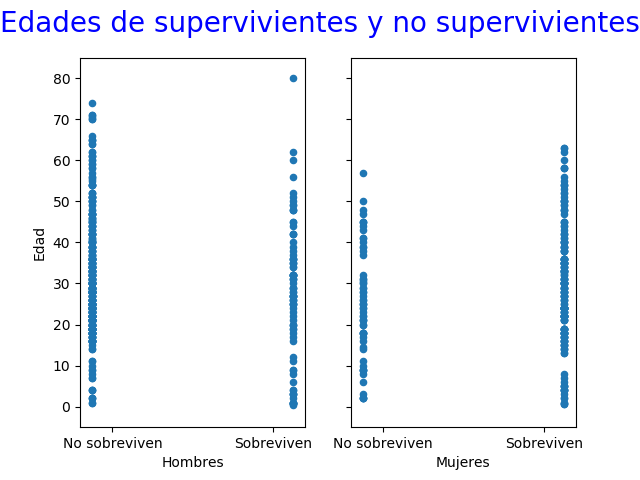

Text(0.5, 0.98, 'Edades de supervivientes y no supervivientes')

In [5]:
hombres=datos.loc[datos.Sex=='male',['Age','Survived']]
hombres=hombres.dropna()
mujeres=datos.loc[datos.Sex=='female',['Age','Survived']]
mujeres=mujeres.dropna()
figura,subfiguras=plt.subplots(1,2)
hombres.plot(ax=subfiguras[0],kind='scatter',x='Survived',y='Age')
subfiguras[0].set_xticks([0.1,0.9])
subfiguras[0].set_xticklabels(['No sobreviven','Sobreviven'],fontsize=10)
subfiguras[0].set_xlabel('Hombres')
subfiguras[0].set_ylabel('Edad')
subfiguras[0].set_ylim(-5,85)
mujeres.plot(ax=subfiguras[1],kind='scatter',x='Survived',y='Age',sharey=subfiguras[0])
subfiguras[1].set_xticks([0.1,0.9])
subfiguras[1].set_xticklabels(['No sobreviven','Sobreviven'],fontsize=10)
subfiguras[1].set_xlabel('Mujeres')
subfiguras[1].set_ylim(-5,85)
figura.suptitle('Edades de supervivientes y no supervivientes',fontsize=20,color='b')

#### Apartado 4
Mostrar en una gráfica el número de viajeros que había en cada clase, según la edad que tenían.
<img src="ejemplo4.png" style="width:300px">

<IPython.core.display.Javascript object>


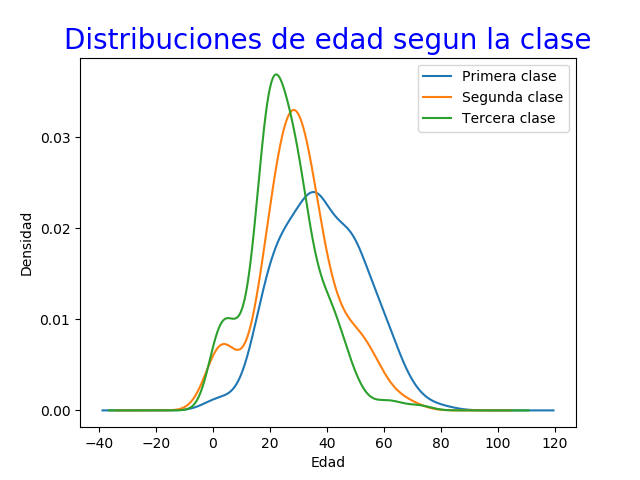

Text(0.5,1,u'Distribuciones de edad segun la clase')

In [6]:
primera=datos.Age[datos.Pclass==1]
segunda=datos.Age[datos.Pclass==2]
tercera=datos.Age[datos.Pclass==3]
plt.figure()
fig=primera.plot(kind='kde', label='Primera clase')
segunda.plot(ax=fig,kind='kde', label='Segunda clase')
tercera.plot(ax=fig,kind='kde',yticks=[0,0.01,0.02,0.03], label='Tercera clase')
fig.set_xlabel('Edad')
fig.set_ylabel('Densidad')
fig.legend()
fig.set_title('Distribuciones de edad segun la clase',color='b',fontsize=20)

#### Apartado 5
Mostrar en un gráfico de barras horizontal el número de pasajeros que viajaban en cada una de las clases.
<img src="ejemplo5.png" style="width:300px">

<IPython.core.display.Javascript object>


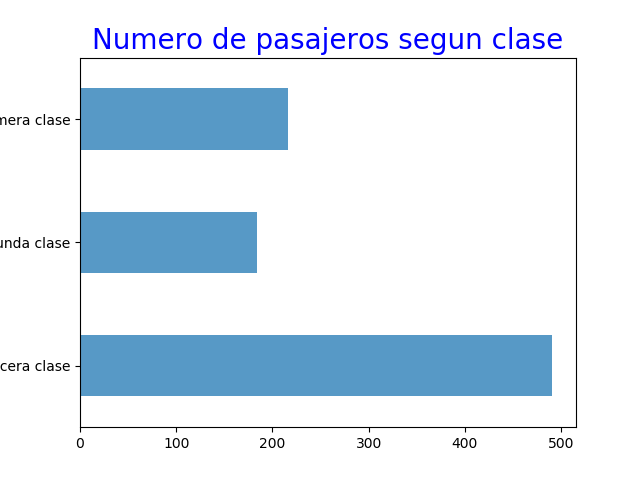

[Text(0,0,u'Tercera clase'),
 Text(0,0,u'Segunda clase'),
 Text(0,0,u'Primera clase')]

In [10]:
clases=datos.Pclass.value_counts()
clases=clases.sort_index(ascending=False)
plt.figure()
fig=clases.plot(kind='barh',alpha=0.75)
fig.set_title('Numero de pasajeros segun clase',color='b',fontsize=20)
fig.set_yticklabels(['Tercera clase','Segunda clase','Primera clase'])

#### Apartado 6
Para intuir qué puertos están cercanos a poblaciones más ricas y qué puertos están cercanos a poblaciones más pobres, mostramos cuántos pasajeros de cada clase embarcaron en cada puerto mediante una gráfica de barras.
<img src="ejemplo6.png" style="width:300px">

<IPython.core.display.Javascript object>


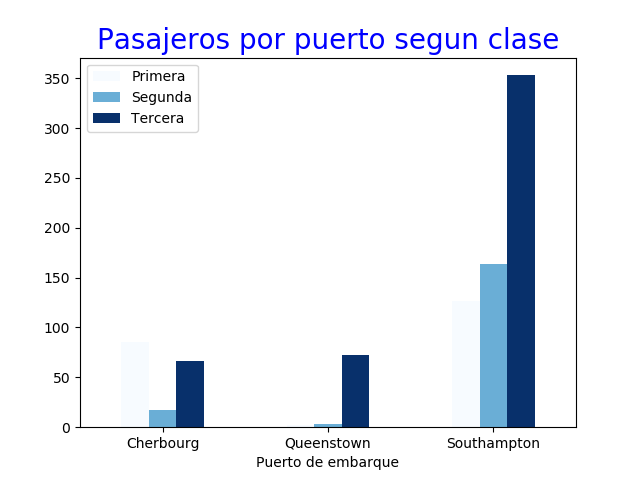

Text(0.5,1,u'Pasajeros por puerto segun clase')

In [12]:
puertos=datos.pivot_table(values='PassengerId',index='Embarked',columns='Pclass',aggfunc='count')
colores=plt.get_cmap('Blues')
fig=puertos.plot(kind='bar',rot=0,cmap=colores)
fig.set_xlabel('Puerto de embarque')
fig.set_xticklabels(['Cherbourg','Queenstown','Southampton'])
fig.legend(['Primera','Segunda','Tercera'],loc=2)
fig.set_title('Pasajeros por puerto segun clase',color='b',fontsize=20)

#### Apartado 7
No todos los pasajeros pagaron el mismo importe por sus billetes. Mostrar en un gráfico de cajas el precio de los billetes dependiendo de la clase a la que pertenecían.
<img src="ejemplo7.png" style="width:300px">

<IPython.core.display.Javascript object>


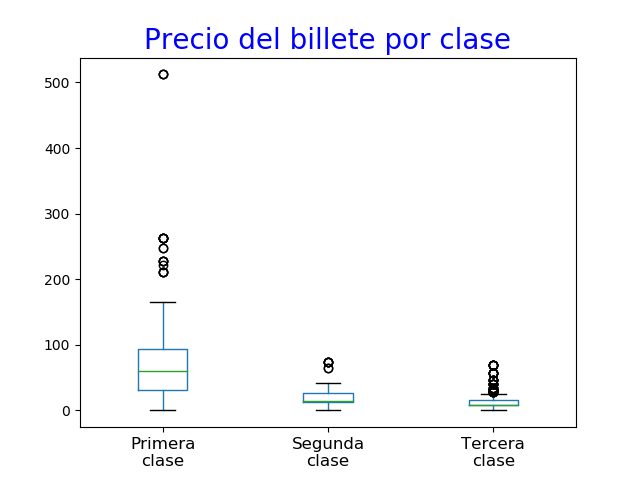

Text(0.5, 1.0, 'Precio del billete por clase')

In [6]:
primera=datos.Fare[datos.Pclass==1]
segunda=datos.Fare[datos.Pclass==2]
tercera=datos.Fare[datos.Pclass==3]
todos=pd.concat([primera,segunda,tercera],axis=1)
fig=todos.plot(kind='box')
fig.set_xticklabels(['Primera\nclase','Segunda\nclase','Tercera\nclase'],fontsize=12)
fig.set_title('Precio del billete por clase',color='b',fontsize=20)